# 初学者的 TensorFlow 2.0 教程

### 将 TensorFlow 载入你的程序：

In [1]:
# 安装 TensorFlow

import tensorflow as tf

In [14]:
import numpy as np
import os
import gzip

In [38]:
from matplotlib import pyplot as plt 

### 载入并准备好 MNIST 数据集。将样本从整数转换为浮点数：

In [25]:
# 这个方法没法加载，只能将数据集下载，本地方法加载
# mnist = tf.keras.datasets.mnist
# (x_train, y_train), (x_test, y_test) = mnist.load_data() 


In [28]:
def ym_load_data(data_folder):
    '''
    ---定义加载数据的函数，data_folder为保存gz数据的文件夹，该文件夹下有4个文件
    ---p:data_folder：数据集路径
    '''

    files = [
      'train-labels-idx1-ubyte.gz', 'train-images-idx3-ubyte.gz',
      't10k-labels-idx1-ubyte.gz', 't10k-images-idx3-ubyte.gz'
    ]

    paths = []
    for fname in files:
        paths.append(os.path.join(data_folder,fname))

    with gzip.open(paths[0], 'rb') as lbpath:
        y_train = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[1], 'rb') as imgpath:
        x_train = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_train), 28, 28)

    with gzip.open(paths[2], 'rb') as lbpath:
        y_test = np.frombuffer(lbpath.read(), np.uint8, offset=8)

    with gzip.open(paths[3], 'rb') as imgpath:
        x_test = np.frombuffer(
        imgpath.read(), np.uint8, offset=16).reshape(len(y_test), 28, 28)

    return (x_train, y_train), (x_test, y_test)


In [48]:
(x_train, y_train), (x_test, y_test) = ym_load_data(r'E:\a_code_place\data\mnist')
x_train, x_test = x_train / 255.0, x_test / 255.0 # st.

In [49]:
x_train.shape

(60000, 28, 28)

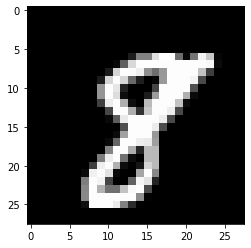

In [76]:
#sample_x = np.mat(x_train[0]) : array -> matrix
#for i in range(1,50):
plt.imshow(x_train[55], plt.cm.gray)
plt.show()

### 将模型的各层堆叠起来，以搭建 tf.keras.Sequential 模型。为训练选择优化器和损失函数：

In [68]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
]
)

In [70]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## 训练并验证模型：

In [71]:
model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 101us/sample - loss: 0.3014 - accuracy: 0.9118
Epoch 2/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.1438 - accuracy: 0.9573
Epoch 3/5
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1087 - accuracy: 0.9670
Epoch 4/5
60000/60000 [==============================] - 6s 92us/sample - loss: 0.0896 - accuracy: 0.9723
Epoch 5/5
60000/60000 [==============================] - 5s 81us/sample - loss: 0.0778 - accuracy: 0.9758
10000/10000 - 1s - loss: 0.0765 - accuracy: 0.9749


[0.07652682289648802, 0.9749]